In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
import tensorflow.compat.v1.keras as keras
import tensorflow.compat.v1.keras.layers as layers
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

height = 28
length = 28
input_size = length*height
label_size = 10

mnist = tf.keras.datasets.mnist
data = mnist.load_data()

data_train_image = data[0][0].reshape(data[0][0].shape[0], height*length).astype("float64") # en ligne
data_train_label = data[0][1]
data_train_label_1h = np.zeros((data_train_label.size, data_train_label.max()+1)).astype("float64")
data_train_label_1h[np.arange(data_train_label.size),data_train_label] = 1

data_test_image = data[1][0].reshape(data[1][0].shape[0], height*length).astype("float64") # en ligne
data_test_label = data[1][1]
data_test_label_1h = np.zeros((data_test_label.size, data_test_label.max()+1)).astype("float64")
data_test_label_1h[np.arange(data_test_label.size),data_test_label] = 1

lr = 0.5

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:

tf_features = tf.placeholder(tf.float32, shape=[None,input_size])
tf_targets = tf.placeholder(tf.float32, shape=[None,label_size])

# input layer
w1 = tf.Variable(tf.random.normal([input_size, label_size]))
b1 = tf.Variable(tf.zeros([label_size]))
# operations
z1 = tf.matmul(tf_features, w1) + b1

p = tf.nn.softmax(z1)

cost = tf.nn.softmax_cross_entropy_with_logits(labels = tf_targets, logits = z1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr)
train = optimizer.minimize(cost)

# metrics
pred_is_correct = tf.equal(tf.round(p), tf_targets)
accuracy = tf.reduce_mean(tf.cast(pred_is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [17]:
epochs = 2000
batch = 1000
show_every = 400
for e in range(epochs):
    rand_indexes = np.random.randint(data_train_label_1h.shape[0], size = batch)
    label_batchs = data_train_label_1h[rand_indexes,:]
    image_batch = data_train_image[rand_indexes,:]

    sess.run(train, feed_dict={
        tf_features: image_batch,
        tf_targets: label_batchs
    })

    if e % show_every == 0:
        print("accuracy:", sess.run(accuracy, feed_dict={
            tf_features: data_train_image,
            tf_targets: data_train_label_1h
        }))

accuracy: 0.89023334
accuracy: 0.97827
accuracy: 0.97828
accuracy: 0.97938
accuracy: 0.9352533
accuracy: 0.98096335
accuracy: 0.96218336
accuracy: 0.9817333
accuracy: 0.97494
accuracy: 0.9776367
accuracy: 0.96188
accuracy: 0.98367333
accuracy: 0.98393
accuracy: 0.96865666
accuracy: 0.9716733
accuracy: 0.98259336
accuracy: 0.98387
accuracy: 0.9635533
accuracy: 0.98350334
accuracy: 0.98319


<ipython-input-18-0024354472ee>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  fig.add_subplot(rows, columns, i+1)


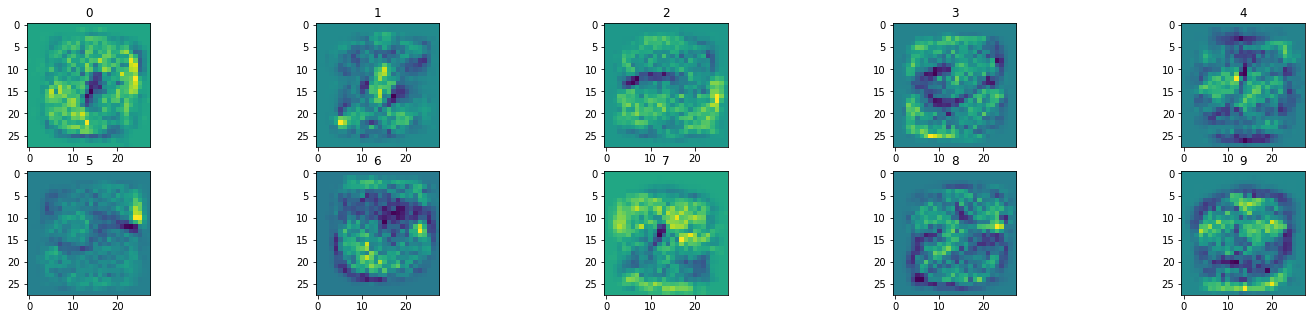

In [18]:
weigths = sess.run(w1)
 
fig = plt.figure(figsize=(25,5))
rows = 2
columns = weigths.shape[1]/rows

for i in range(weigths.shape[1]):
    fig.add_subplot(rows, columns, i+1)
    img = weigths[:,i].reshape(28,28)
    plt.imshow(img)
    plt.title(i)
plt.show()

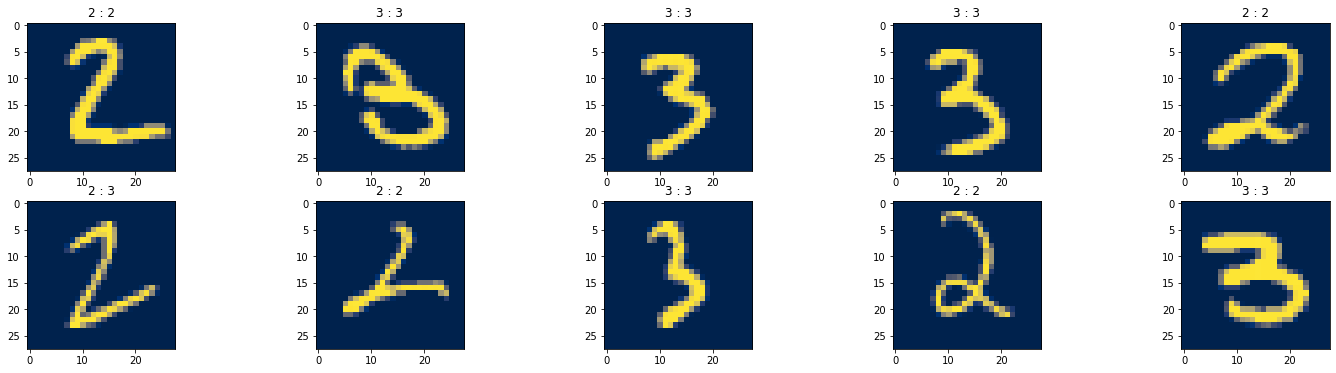

In [70]:
# test_w, labels = data_train_image, data_train_label
test_w, labels = data_test_image, data_test_label
test_digits = [2,3]
rows = 2
columns = 5
n=rows*columns

test_digit_filter = [e in test_digits for e in labels]

imgs = test_w[test_digit_filter]
labels = labels[test_digit_filter]

fig = plt.figure(figsize=(25,6))
for i in range(n):
    fig.add_subplot(rows, columns, i+1)

    img = imgs[i].reshape(28,28)
    label = labels[i]

    pred = np.argmax(sess.run( p, feed_dict={ tf_features: [imgs[i]] } ) )

    plt.imshow(img, cmap = "cividis")
    plt.title(f"{label} : {pred}")
plt.show()

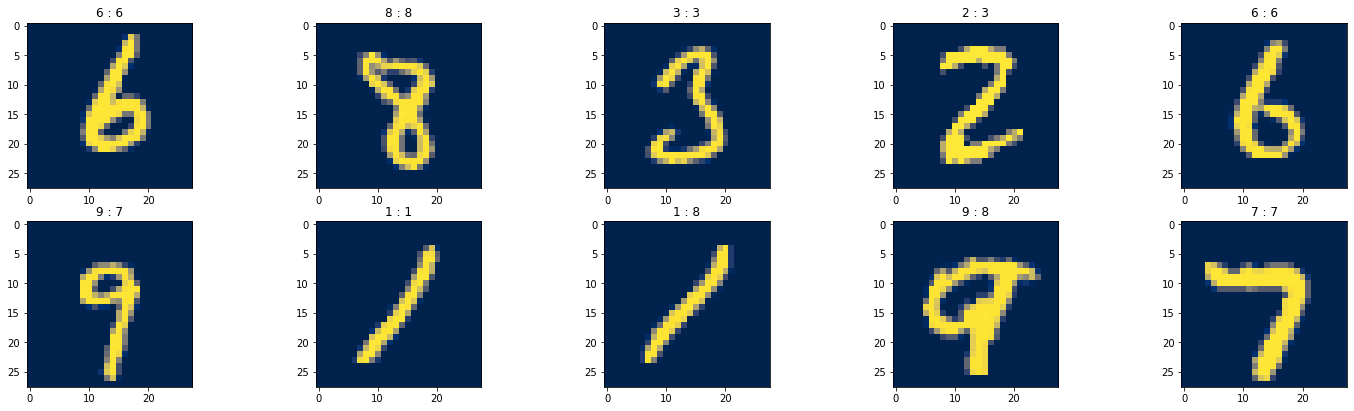

In [71]:
# test_w, labels = data_train_image, data_train_label
test_w, labels = data_test_image, data_test_label
test_n = 20
rows = 4
columns = 5
n=rows*columns

indexes = np.random.randint(test_w.shape[0], size = 10)
imgs = test_w[indexes]
labels = labels[indexes]

fig = plt.figure(figsize=(25,14))
for i in range(imgs.shape[0]):
    fig.add_subplot(rows, columns, i+1)

    img = imgs[i].reshape(28,28)
    label = labels[i]

    pred = np.argmax(sess.run( p, feed_dict={ tf_features: [imgs[i]] } ) )

    plt.imshow(img, cmap = "cividis")
    plt.title(f"{label} : {pred}")
plt.show()

In [25]:
test_w, labels = data_train_image, data_train_label
# test_w, labels = data_test_image, data_test_labels

test_n = 20
rand_indexes = np.random.randint(test_w.shape[0], size = test_n)
test_imgs = test_w[rand_indexes]
test_labels = labels[rand_indexes]
preds = []

pred_1h = sess.run(p, feed_dict={tf_features: test_imgs})
preds = np.argmax(pred_1h, 1)

j = 0
for i in range(test_n):
    if preds[i] != test_labels[i]:
        preds[j], test_labels[j] = preds[i], test_labels[i]
        j+=1
        


print(f" preds: {preds}")
print(f"labels: {test_labels}")

 preds: [7 4 4 6 6 1 7 1 6 8 9 7 0 7 3 2 0 7 4 5]
labels: [8 4 4 6 6 1 7 1 6 8 9 8 0 7 3 2 0 7 4 5]
